# P6 EDA Assignment - Small Business Facebook Posts
- Author: Matthew Block
- CAO: 13 Feb 2025

## Description
My wife has [a small business offering art classes and private lessons](https://www.hawaiiartclasses.com), and asked me to see if I could find any useful insights to help improve her marketing and sales. At first I looked into her sales data through Square, but there's a lot of personal customer data in there that doesn't belong in a public repository. So I checked out Facebook post data from her [business page on Facebook](https://www.facebook.com/rebeccablockartworks) and decided that would be a much better fit for this project.  
Facebook/Meta allows you to download historical content performance data to a CSV file, so I grabbed approximately a year's worth of data and pulled it into my data folder. Let's walk through some exploratory data analyis to see what we can learn from it. The primary objective will be to recommend an improved posting strategy to attract more customers.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. Import Requirements
- pandas for wrangling the data
- matplotlib & seaborn for visualization
- CSVs for the data  
Facebook only allows 92 days of data at a time. So to gather the past year's data I had to download four CSVs.  
Let's read those into dataframes and combine them:

In [16]:
# Import data
df1 = pd.read_csv('./data/Feb-18-2024_May-19-2024_980630036772690.csv')
df2 = pd.read_csv('./data/May-20-2024_Aug-14-2024_1169162484575274.csv')
df3 = pd.read_csv('./data/Aug-15-2024_Nov-13-2024_938308191626713.csv')
df4 = pd.read_csv('./data/Nov-15-2024_Feb-12-2025_438700299233158.csv')
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

# Comnine data into one dataframe
df = pd.concat([df1, df2, df3, df4])
df.shape
print(df.head(10))
print(df.dtypes)


(12, 45)
(8, 46)
(6, 42)
(28, 50)
           Post ID          Page ID                     Page name  \
0  923886339461725  100055211027046  Rebecca Block Art and Design   
1  965410865309272  100055211027046  Rebecca Block Art and Design   
2  961004025749956  100055211027046  Rebecca Block Art and Design   
3  960878012429224  100055211027046  Rebecca Block Art and Design   
4  955834116266947  100055211027046  Rebecca Block Art and Design   
5  955254709658221  100055211027046  Rebecca Block Art and Design   
6  950836110100081  100055211027046  Rebecca Block Art and Design   
7  946439730539719  100055211027046  Rebecca Block Art and Design   
8  942548280928864  100055211027046  Rebecca Block Art and Design   
9  941957634321262  100055211027046  Rebecca Block Art and Design   

                                               Title  \
0  Aloha! I suppose I should make my first post-c...   
1  Work in progress - I'm recording a bunch of pr...   
2  Register now for art classes in May

2. Initial Inspection & Cleaning  
Based on the shapes, I can see that the concat function successfully pulled all my data together into 54 rows and 50 columns. I already know from a quick peak at the CSVs after downloading that I won't need all 50 of those columns, so let's inspect further to see what might be useful:

In [3]:
print(df.columns)

Index(['Post ID', 'Page ID', 'Page name', 'Title', 'Description',
       'Duration (sec)', 'Publish time', 'Caption type', 'Permalink',
       'Is crosspost', 'Is share', 'Post type', 'Languages', 'Custom labels',
       'Funded content status', 'Data comment', 'Date', 'Impressions', 'Reach',
       'Reactions, Comments and Shares', 'Reactions', 'Comments', 'Shares',
       'Total clicks', 'Matched Audience Targeting Consumption (Photo Click)',
       'Other Clicks', 'Link Clicks', 'Impressions from Unpaid posts',
       'Impressions from Boosted posts', 'Reach from Organic posts',
       'Reach from Boosted posts', '3-second video views',
       '1-minute video views', '3-Second viewers', '1-minute viewers',
       '3-second video views from Boosted posts',
       '3-second video views from Organic posts', 'Engaged users',
       'Negative feedback from users', 'Unique negative feedback from users',
       'REELS_PLAYS:COUNT', 'Seconds viewed', 'Average Seconds viewed',
       'Estima

I can already see some unneeded columns:
- Page ID (same across whole dataset)
- Page name
- Permalink (not informative)
- Languages
- Reach from Boosted posts (we didn't pay for any boosts or ads)
- Impressions from Boosted posts
- Funded content status
- 3-second video views from Boosted posts
- Estimated earnings (USD) (not tracked)
- Ad impressions
- Ad CPM (USD)
Let's get rid of those:

In [4]:
df.drop(['Page ID', 'Page name', 'Permalink', 'Languages', 'Funded content status', 'Reach from Boosted posts', 'Impressions from Boosted posts', '3-second video views from Boosted posts', 'Estimated earnings (USD)', 'Ad impressions', 'Ad CPM (USD)'], axis=1, inplace=True)
print(df.columns)
df.shape

Index(['Post ID', 'Title', 'Description', 'Duration (sec)', 'Publish time',
       'Caption type', 'Is crosspost', 'Is share', 'Post type',
       'Custom labels', 'Data comment', 'Date', 'Impressions', 'Reach',
       'Reactions, Comments and Shares', 'Reactions', 'Comments', 'Shares',
       'Total clicks', 'Matched Audience Targeting Consumption (Photo Click)',
       'Other Clicks', 'Link Clicks', 'Impressions from Unpaid posts',
       'Reach from Organic posts', '3-second video views',
       '1-minute video views', '3-Second viewers', '1-minute viewers',
       '3-second video views from Organic posts', 'Engaged users',
       'Negative feedback from users', 'Unique negative feedback from users',
       'REELS_PLAYS:COUNT', 'Seconds viewed', 'Average Seconds viewed',
       'Views', 'Views.1', 'IMPRESSION:UNIQUE_USERS',
       'IMPRESSION:UNIQUE_USERS.1'],
      dtype='object')


(54, 39)

A lot of these columns still don't have much useful differentiation between them, so let's get a closer look and see what else can be removed:

In [5]:
df.describe()

,Post ID,Duration (sec),Caption type,Is crosspost,Is share,Custom labels,Data comment,Impressions,Reach,"Reactions, Comments and Shares",...,Engaged users,Negative feedback from users,Unique negative feedback from users,REELS_PLAYS:COUNT,Seconds viewed,Average Seconds viewed,Views,Views.1,IMPRESSION:UNIQUE_USERS,IMPRESSION:UNIQUE_USERS.1
count,5.400000e+01,54.000000,0.0,54.000000,54.000000,0.0,0.0,49.000000,49.000000,49.000000,...,44.000000,44.0,44.0,7.000000,7.000000,7.000000,28.0,28.0,5.0,5.0
mean,1.079608e+15,4.388889,NaN,0.055556,0.055556,NaN,NaN,126.714286,112.469388,9.632653,...,12.977273,0.0,0.0,133.285714,723.389857,7.051571,0.0,0.0,0.0,0.0
std,2.439973e+14,13.014385,NaN,0.231212,0.231212,NaN,NaN,154.046800,129.515781,14.365314,...,15.968703,0.0,0.0,143.886198,794.599679,1.097093,0.0,0.0,0.0,0.0
min,5.655498e+14,0.000000,NaN,0.000000,0.000000,NaN,NaN,22.000000,22.000000,0.000000,...,0.000000,0.0,0.0,21.000000,117.767000,5.623000,0.0,0.0,0.0,0.0
25%,9.697366e+14,0.000000,NaN,0.000000,0.000000,NaN,NaN,60.000000,51.000000,2.000000,...,3.000000,0.0,0.0,57.000000,302.631500,6.223500,0.0,0.0,0.0,0.0
50%,1.084684e+15,0.000000,NaN,0.000000,0.000000,NaN,NaN,80.000000,73.000000,5.000000,...,8.000000,0.0,0.0,111.000000,382.393000,6.860000,0.0,0.0,0.0,0.0
75%,1.150719e+15,0.000000,NaN,0.000000,0.000000,NaN,NaN,129.000000,107.000000,11.000000,...,14.250000,0.0,0.0,119.500000,761.298000,7.964500,0.0,0.0,0.0,0.0
max,2.587520e+15,57.000000,NaN,1.000000,1.000000,NaN,NaN,899.000000,762.000000,76.000000,...,79.000000,0.0,0.0,448.000000,2435.710000,8.502000,0.0,0.0,0.0,0.0


From the describe function, I can see there are a handful of columns with a count of 0 (so there's no useful data). Let's check for these and get rid of them:

In [6]:
column_counts = df.count()
print(column_counts)

Post ID                                                 54
Title                                                   53
Description                                              7
Duration (sec)                                          54
Publish time                                            54
Caption type                                             0
Is crosspost                                            54
Is share                                                54
Post type                                               54
Custom labels                                            0
Data comment                                             0
Date                                                    54
Impressions                                             49
Reach                                                   49
Reactions, Comments and Shares                          49
Reactions                                               49
Comments                                                

In [7]:
# Drop columns with no data
df.drop(['Caption type', 'Custom labels', 'Data comment', '1-minute video views', '1-minute viewers', 'Negative feedback from users', 'Unique negative feedback from users', 'Views', 'Views.1', 'IMPRESSION:UNIQUE_USERS', 'IMPRESSION:UNIQUE_USERS.1'], axis=1, inplace=True)

Now that the obvious is gone, I'll print the dataframe and open it in the Data Wrangler extension and see if anything else stands out:

In [8]:
print(df)

             Post ID                                              Title  \
0    923886339461725  Aloha! I suppose I should make my first post-c...   
1    965410865309272  Work in progress - I'm recording a bunch of pr...   
2    961004025749956  Register now for art classes in May! Registrat...   
3    960878012429224  Some artists LOVE using a logical, scientific ...   
4    955834116266947  Two cacao pods of various ripeness and sizes, ...   
5    955254709658221  This cowrie shell is a piece of work! Phew! Al...   
6    950836110100081  I got it, y'all! The SPAM Hawaiian Collectors ...   
7    946439730539719  Who out there is interested in a color theory ...   
8    942548280928864  Have you seen those gray kneaded erasers in th...   
9    941957634321262  Three views of the same shell. I like the bott...   
10   941327671050925  I wanted to draw this limpet shell life-sized ...   
11   934472175069808  April classes are now live! Click through the ...   
0    982713803578978  Hel

3. Feature Engineering  
Here's what I saw:
- The few entries with Description data, it's identical to Title. So that can go.
- Some columns are a 1 or 0 that actually represent a Boolean True or False. We can change those to Bools:
  - Is crosspost
  - Is share
- Everything under Date says lifetime. So that can go.
- Publish time contains both date and time. That might be worth breaking out into separate fields.
- Post type has a few unique categories and is a good candidate for hue differentiation during visualizations
- The posts vary widely in length and I'm curious if post length correlates to engagment at all. Let's add a column for length of post.

In [ ]:
# Drop unnecessary columns
df.drop(['Description', 'Date'], axis=1, inplace=True)

# Rename "Post ID" to "ID" (rename required for assignment specs)
df.rename(columns={'Post ID': 'ID'}, inplace=True)

# Convert 'Publish time' to datetime
df['Publish time'] = pd.to_datetime(df['Publish time'])

# Extract info from 'Publish time' for new columns
df['Day of week'] = df['Publish time'].dt.day_name()
df['Hour'] = df['Publish time'].dt.hour

# Convert columns to Bools
df['Is crosspost'] = df['Is crosspost'].astype(bool)
df['Is share'] = df['Is share'].astype(bool)

# Function to count words in a string
def count_words(text):
    if pd.isnull(text):
        return 0
    return len(text.split())
df['Post length'] = df['Title'].apply(count_words)

# Convert any remaining missing values to 0
df.fillna(0, inplace=True)

4. Visualisation
Not all columns are worth comparing to each other, so let's divide numerical columns into inputs and outputs to compare against each other in scatterplots:

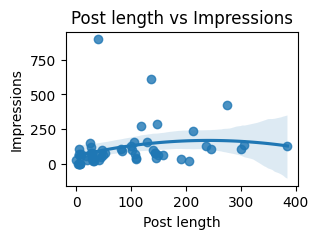

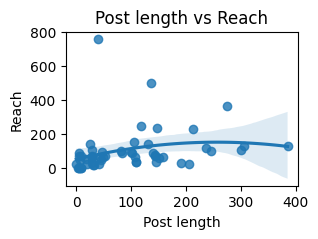

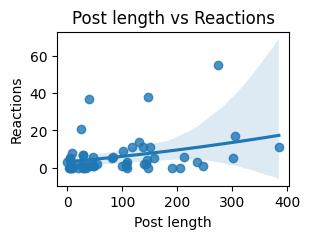

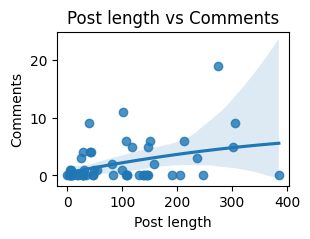

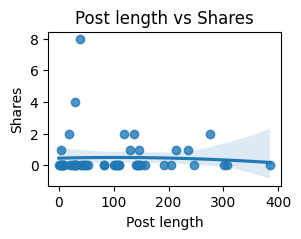

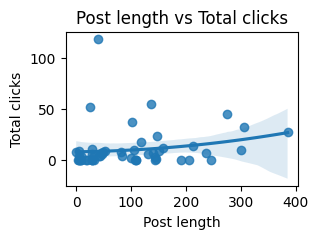

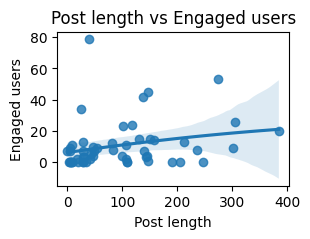

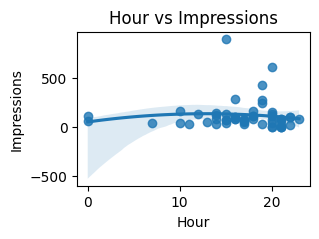

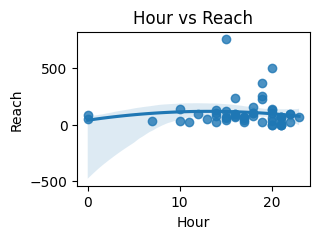

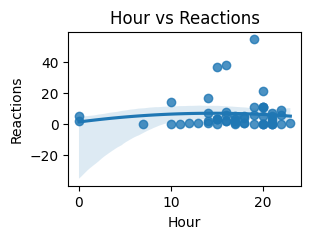

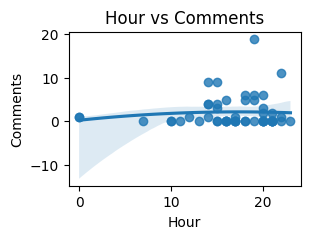

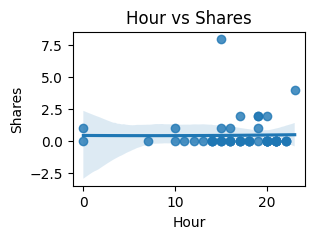

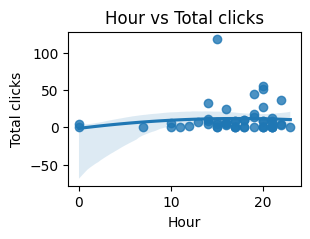

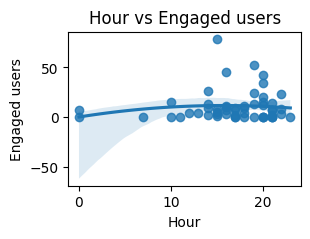

In [12]:
# Define inputs and outputs
inputs = ['Post length', 'Hour']
outputs = ['Impressions', 'Reach', 'Reactions', 'Comments', 'Shares', 'Total clicks', 'Engaged users']

# Create individual scatter plots
for i in inputs:
    for o in outputs:
        plt.figure(figsize=(3, 2))  # Set the plot size (width, height)
        sns.regplot(data=df, x=i, y=o, order=2, 
                    # hue = 'Post type'
                    )
        plt.title(f'{i} vs {o}')
        plt.show()

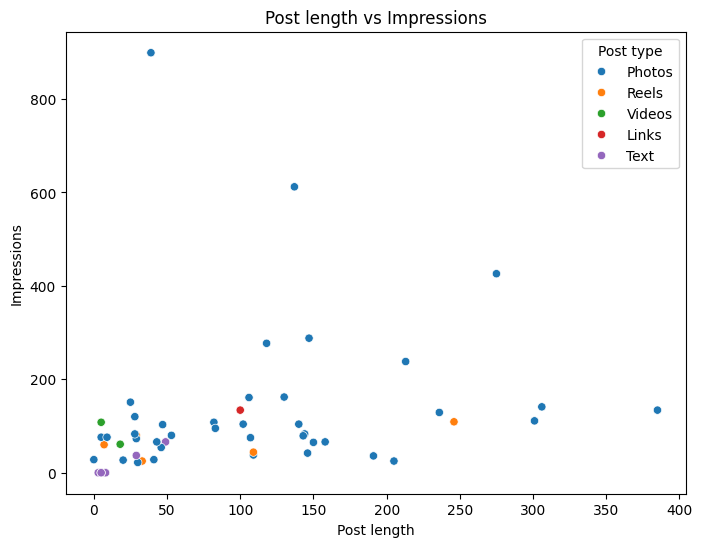

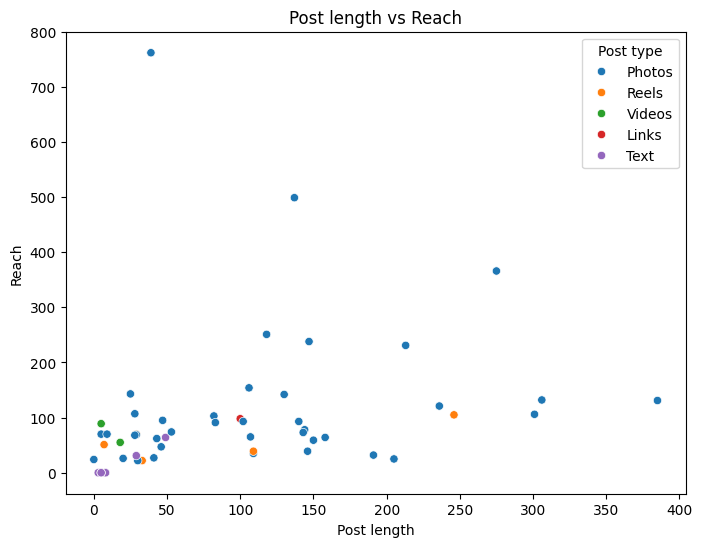

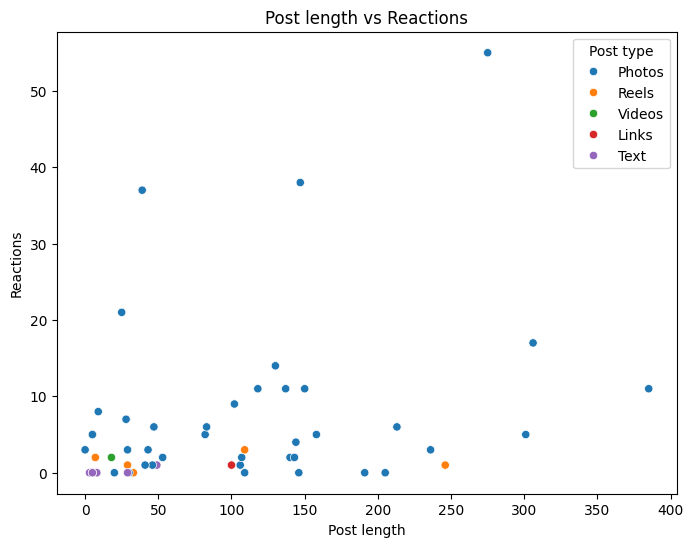

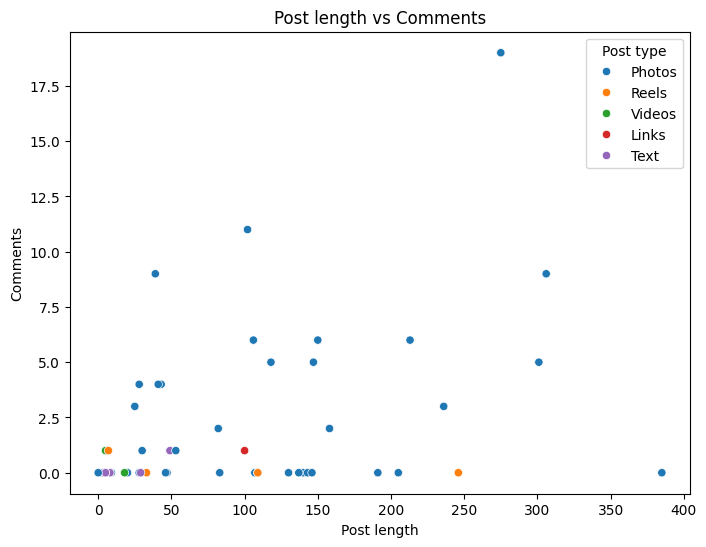

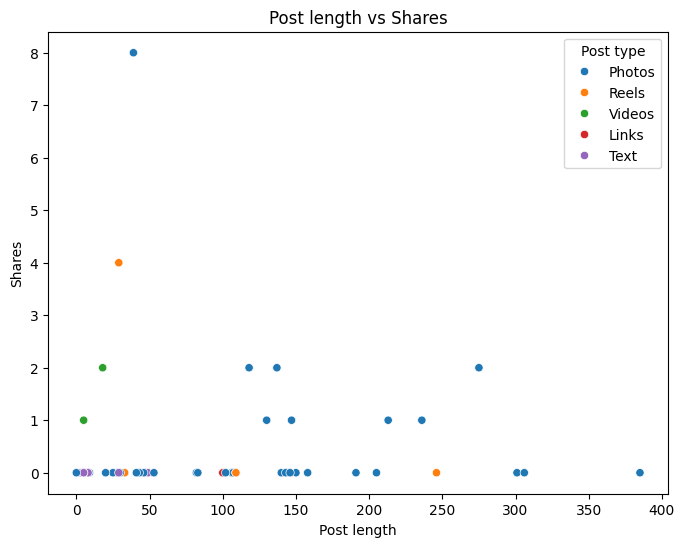

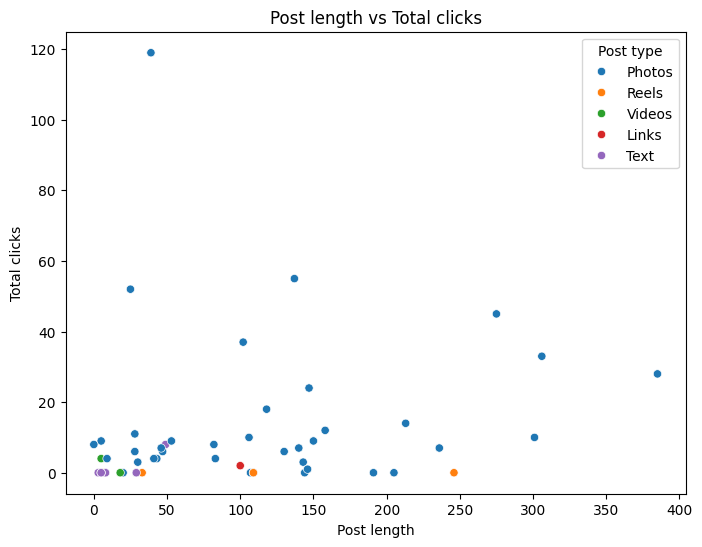

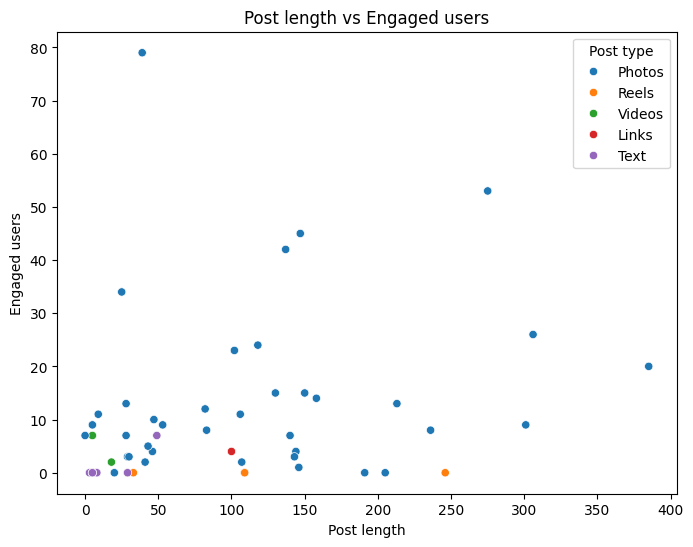

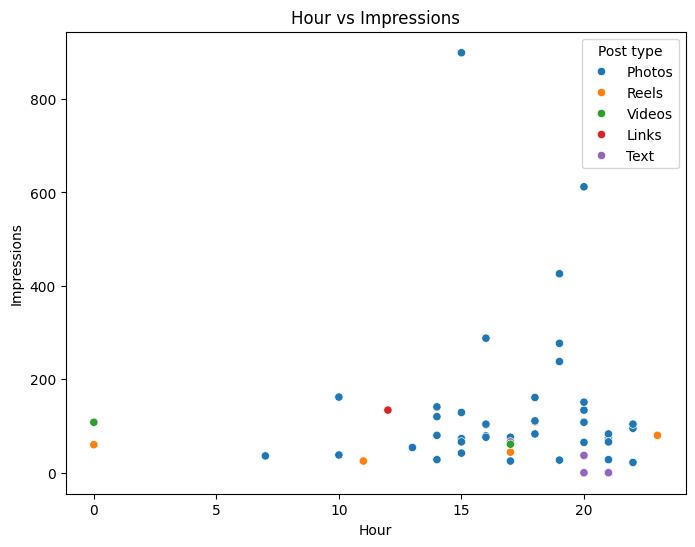

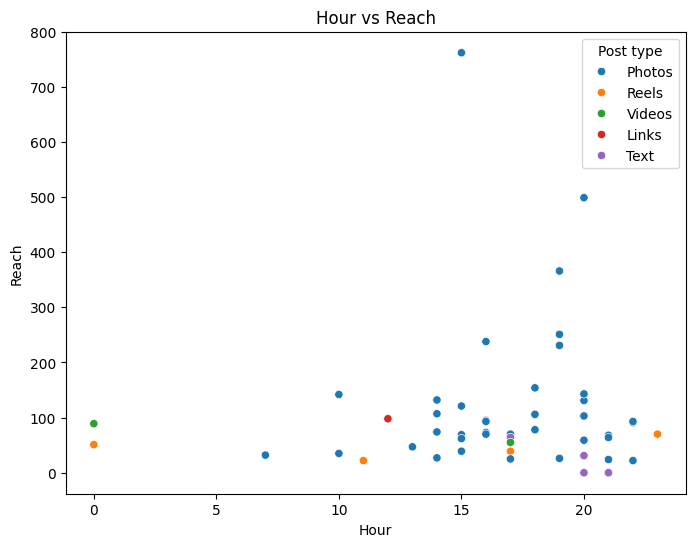

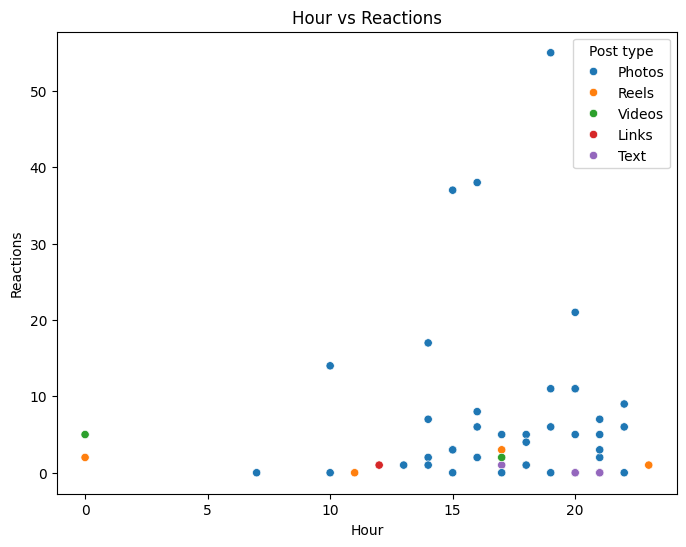

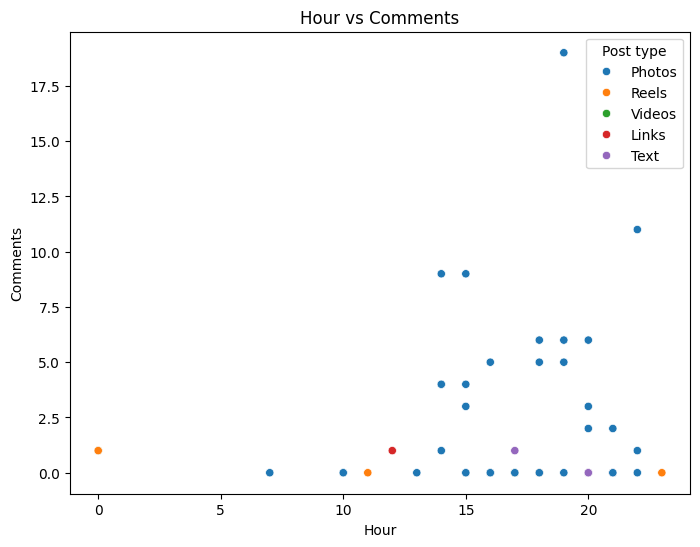

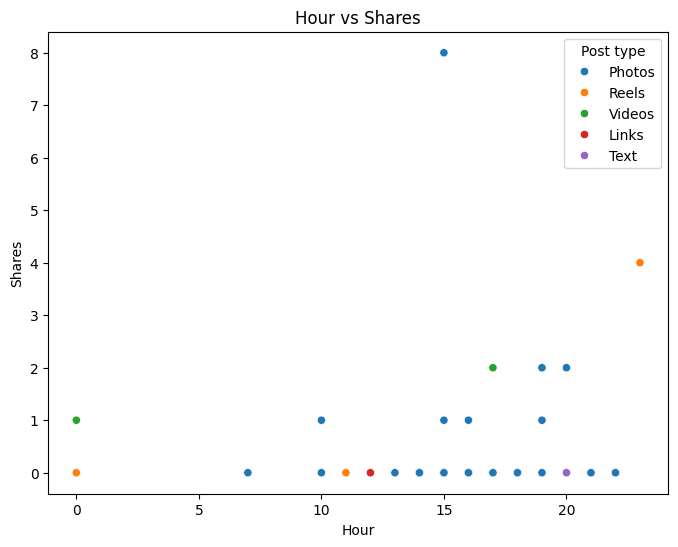

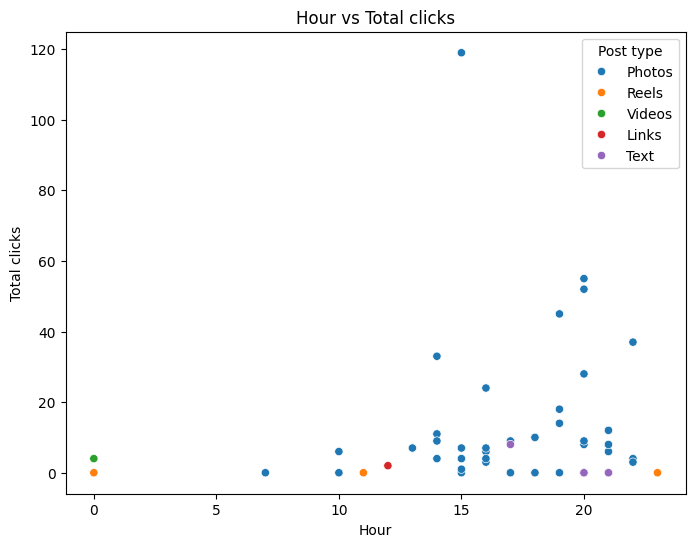

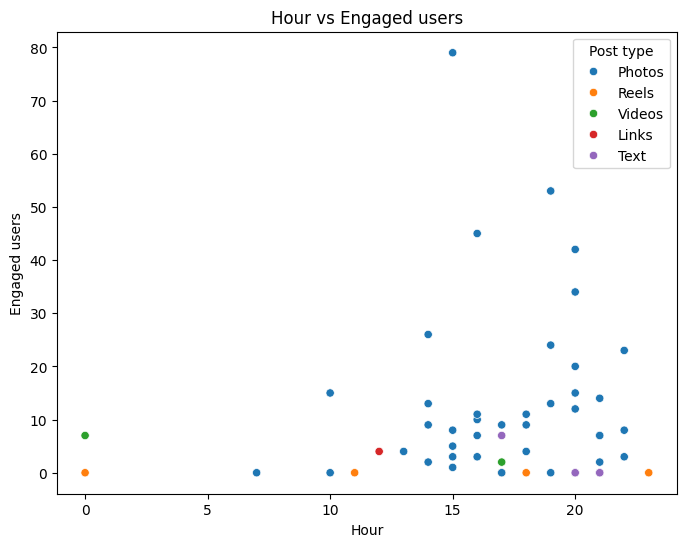

In [15]:
# Create individual scatter plots
for i in inputs:
    for o in outputs:
        plt.figure(figsize=(8, 6))  # Set the plot size (width, height)
        sns.scatterplot(data=df, x=i, y=o, 
                    hue = 'Post type'
                    )
        plt.title(f'{i} vs {o}')
        plt.show()

Let's also look at the categorical colum "Day of week" as an input:


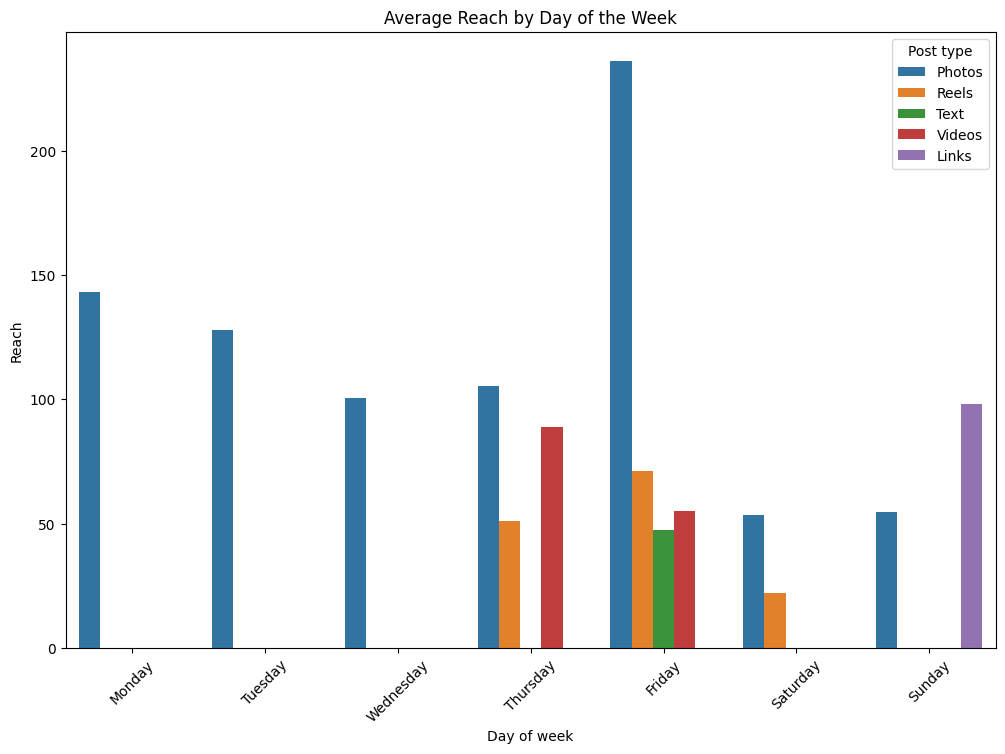

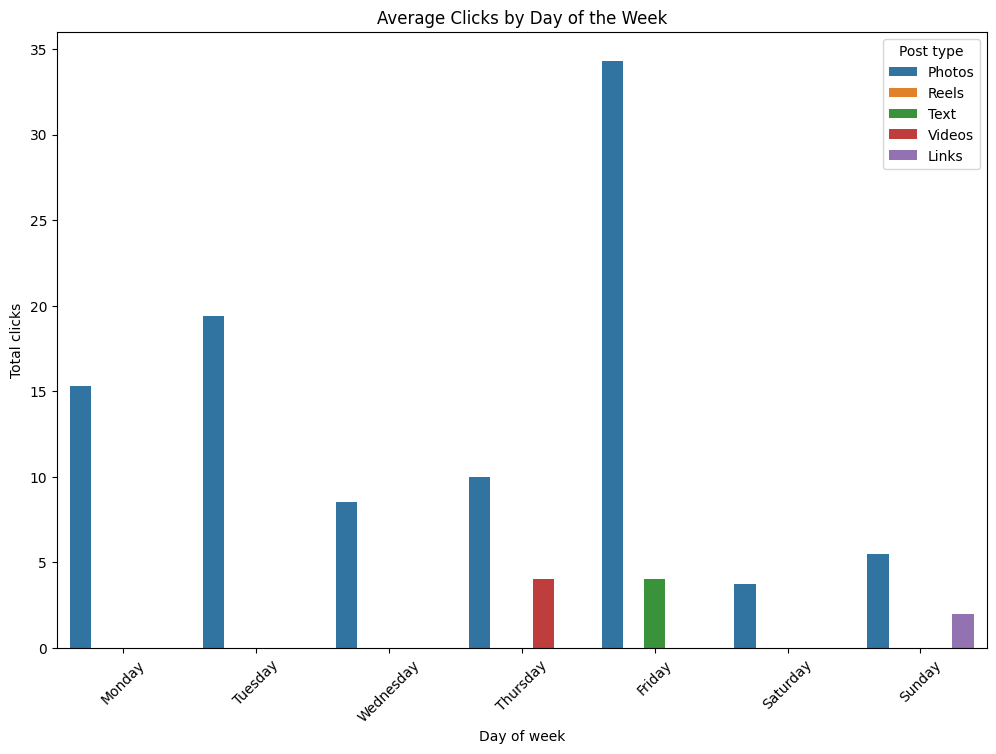

In [ ]:
# Group by 'Day of week' and 'Post type' and calculate the mean for each output column
averages = df.groupby(['Day of week', 'Post type'])[outputs].mean().reset_index()

# Specify the correct order for the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
averages['Day of week'] = pd.Categorical(averages['Day of week'], categories=day_order, ordered=True)

# Create a bar plot for each metric
plt.figure(figsize=(12, 8))
sns.barplot(data=averages, x='Day of week', y='Reach', hue='Post type')
plt.title('Average Reach by Day of the Week')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for each metric
plt.figure(figsize=(12, 8))
sns.barplot(data=averages, x='Day of week', y='Total clicks', hue='Post type')
plt.title('Average Clicks by Day of the Week')
plt.xticks(rotation=45)
plt.show()

## Recommnedations  
Based on this exploration of the posting data, I have the following recommendations:
- Content should primarily be posted through the week vs over the weekend.
- Longer content appears to perform better for most result types, with a possible peak at around 250 words.
- Future posting strategy could emphasize a more even balance of post types to supply more data on the strenths and differences of each. It's possible diffent post types have different optimal days or times.
- There does appear to be an optimal time window for posting. Due to the target market being in a different time zone the current page's audience these times are likely different than the provided data shows, but an optimal window likely still exists.
- Segmentation of target market vs generic audience results would provide more useful data.
- There are a few high-performing outliers. Those should be examined for qualitative characteristics that can be replicated.